In [1]:
library(igraph)
library(ggraph)
library(sna)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


Loading required package: network


‘network’ 1.18.2 (2023-12-04), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


sna: Tools for Social N

In [2]:
# link to google docs: https://docs.google.com/document/d/1nhuq8nMkkJYoCiBfyqJdmrXghNSGDFrjzqvVJjOmcbA/edit?usp=sharing

In [3]:
# Load the affective network data
affective_data <- read.csv("2400_affective_w1.csv")
# Load the drinking data
drinking_data <- read.csv("2400_drink.csv")


In [7]:
# keep NA and values that are 1 and set everything else to 0
# Dont know if friends are also supposed to be part of the liking network

for (i in 1:nrow(affective_data)) {
    for (j in 2:ncol(affective_data)) {
        val <- affective_data[i,j]
        if (!is.na(val) && val != 1) {
            affective_data[i,j] <- 0
        }
    }
}

In [35]:
# convert adjacency data frame as matrix
aff_mat <- as.matrix(affective_data)[,2:28]
aff_mat

X2401,X2402,X2403,X2404,X2405,X2406,X2407,X2408,X2409,X2411,⋯,X2420,X2421,X2422,X2424,X2425,X2426,X2427,X2428,X2429,X2491
NA,0,1,0,0,1,1,1,1,1,⋯,1,1,1,0,1,1,0,1,0,0
0,NA,0,0,0,0,0,1,0,1,⋯,0,0,0,1,0,0,0,0,0,0
0,0,NA,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,1,0
0,1,0,NA,1,0,1,0,0,0,⋯,1,1,0,1,0,1,1,1,0,0
0,0,0,1,NA,1,1,0,0,1,⋯,0,0,0,0,0,0,1,1,0,1
0,0,0,0,1,NA,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,NA,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
0,1,0,0,0,0,0,NA,0,1,⋯,0,0,0,1,0,0,0,0,1,0
1,1,0,1,1,1,1,1,NA,1,⋯,1,1,1,1,0,1,1,1,1,0
1,0,0,0,0,0,0,0,0,NA,⋯,0,0,0,0,0,0,0,0,0,0


In [36]:
# create graph using igraph library
graph <- graph_from_adjacency_matrix(aff_mat,
                          mode = "directed",  # telling igraph that ties are directed
                          diag = F # loops (self-ties) are not permitted
                          )


In [56]:
# fromat drinking data

drinking <- drinking_data$drinking.w1

for (i in 1:length(drinking)) {
    if(drinking[i] == 1) {
        drinking[i] <- "I have never tried alcohol"
    }else if (drinking[i] == 2) {
        drinking[i] <- "I have tried it, but I never drink"
    }else if (drinking[i] == 3) {
        drinking[i] <- "I drink occasionally"
    }else {
        drinking[i] <- "I drink at least once a week"
    }
}
drinking

[1] "I have tried it, but I never drink" "I drink occasionally"              
 [3] "I have tried it, but I never drink" "I drink occasionally"              
 [5] "I drink occasionally"               "I have tried it, but I never drink"
 [7] "I have tried it, but I never drink" "I have never tried alcohol"        
 [9] "I have tried it, but I never drink" "I drink occasionally"              
[11] "I have tried it, but I never drink" "I drink occasionally"              
[13] "I drink occasionally"               "I have tried it, but I never drink"
[15] "I drink occasionally"               "I drink at least once a week"      
[17] "I have tried it, but I never drink" "I drink occasionally"              
[19] "I drink at least once a week"       "I have tried it, but I never drink"
[21] "I have tried it, but I never drink" "I drink occasionally"              
[23] "I drink occasionally"               "I have tried it, but I never drink"
[25] "I have tried it, but I never drink" "I drink occasionally"              
[27] "I have tried it, but I never drink"

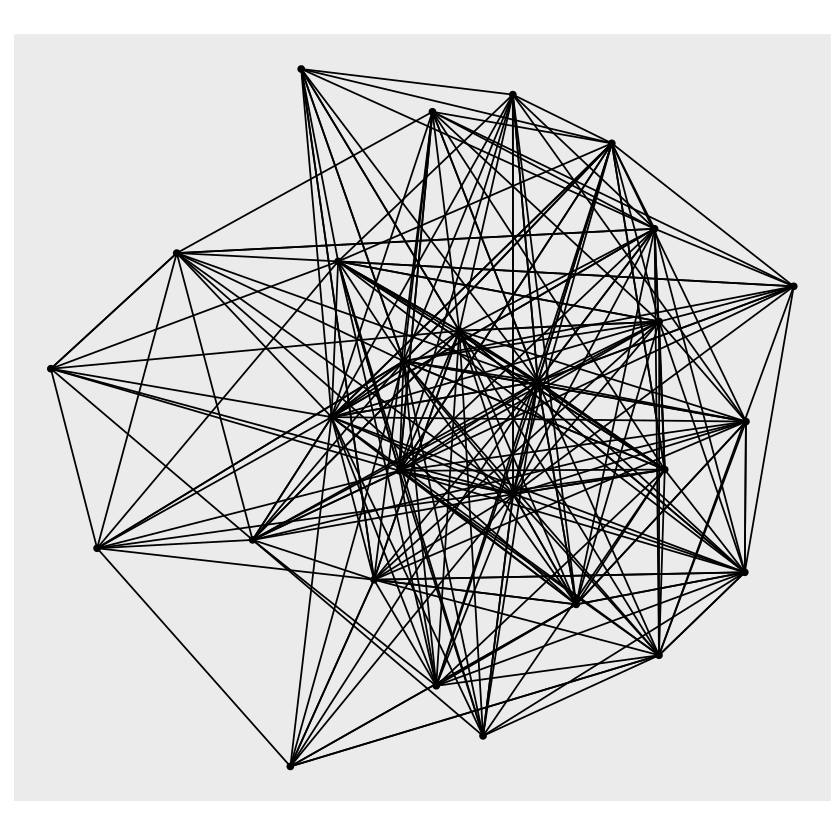

In [60]:
# create first graph plot
autograph(graph)

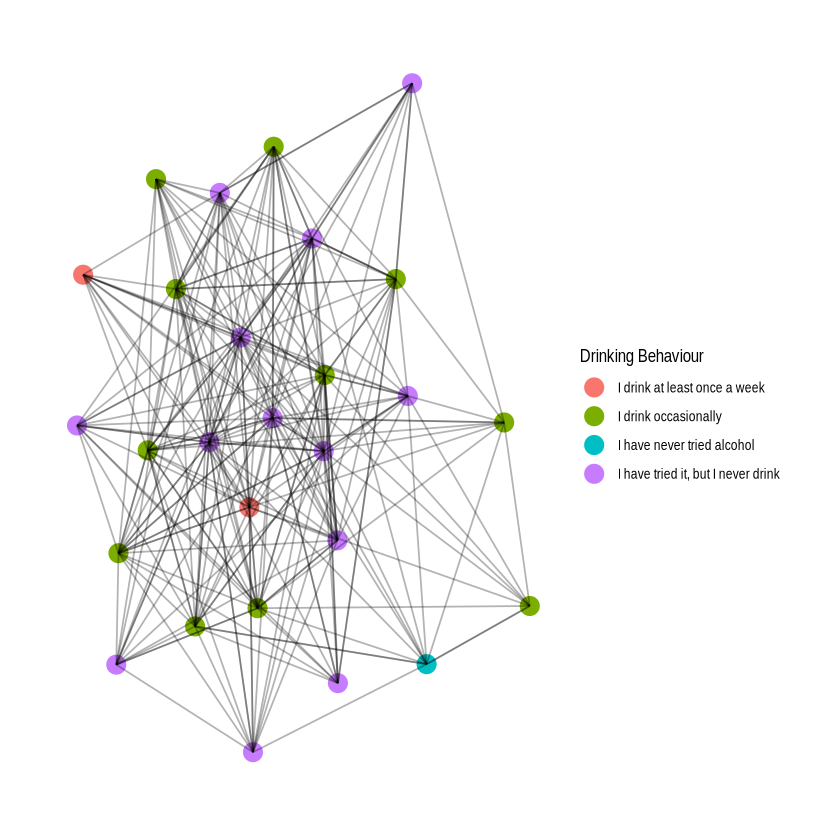

In [62]:
set.seed(125)

labels <- labs(colour = "Drinking Behaviour")

ggraph(
    graph, 
    layout = 'fr')+ 
  geom_node_point(
    aes(colour = as.factor(drinking)),
    size = 5)+ 
  geom_edge_link(
    alpha = .3)+ 
  theme_graph()+
  labels

In [66]:
# Number of nodes
graph_size <- vcount(graph)
graph_size

[1] 27

In [71]:
# Density

num_possible_links <- graph_size * (graph_size-1) 

density <- ecount(graph) / num_possible_links

density

[1] 0.3603989

In [79]:
# average degree



Warning message:
“`graph.adjacency()` was deprecated in igraph 2.0.0.
ℹ Please use `graph_from_adjacency_matrix()` instead.”


ERROR: Error in graph.adjacency(): argument "adjmatrix" is missing, with no default
